<a href="https://colab.research.google.com/github/Edimosphy/Symptom-Medicare/blob/main/3mtt_Module5_Miniproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3mtt Module 5 Miniproject: Evaluating the Impact of Marketing Campaigns**

##**Module 5 Objective**

**Objective**

The primary objective of this case study is to perform hypothesis testing on the e-commerce dataset to compare different groups or features. Specifically, we aim to:

- Analyze the experimental and control groups to determine if the ads were successful.

- Estimate the potential revenue generated from the ads.

- Assess the statistical significance of the differences between the groups using A/B testing techniques.

##**STEP 1: Define Business Objectives, Problems and Goals**

**Obectives**
- To determine whether ad campaigns are driving profitability and customer conversion.

- To use A/B hypothesis testing results to improve marketing effectiveness and revenue

- To identify optimal timing and volume of ad delivery for maximum customer engagement.

- To uncover user behaviour patterns that influence high-value conversions.


**Problems**
- Low profitability despite running ad campaigns.

- Minimal market share gain due to ineffective audience targeting.

- High campaign costs with low conversion rates, leading to poor return on investment (ROI) and revenue

- Ads fail to attract high-paying, loyal customers, resulting in wasted marketing spend.


**Goals**
- Achieve high profitability through optimized ad performance.

- Run successful and cost-effective campaigns that convert.

- Gain larger market share by targeting users more effectively.

- Attract and retain high-paying, active customers through data-informed strategies.




##**STEP 2: Research Formulate Questions for Insights and EDA**
- What is the conversion rate in the ad group compared to the PSA/control group?

- Does a higher number of ads viewed increase the likelihood of conversion and profitability?

- On which day of the week are ads most seen, and does that impact conversion success?

- What is the peak hour for ad exposure, and how does it relate to purchase behavior?

- Are users who see many ads but don’t convert showing any common patterns?

- Which ad exposure patterns (e.g., frequency, timing) lead to high-paying and returning customers?

- Is there a statistically significant difference in conversion success and ROI between the test groups?



##**STEP 3: Libraries importation, Data Loading and Profiling, Data Cleaning and Preparation**

**Libraries Importation**


In [ ]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use('ggplot')

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

**Data Loading and Profiling**

In [ ]:
#Before loading the dataset for this project
#First mount the goggle drive to have access to the dataset

#Load the dataset for profiling
df= pd.read_csv("/content/drive/MyDrive/3MTT/Assignment, Miniproject/marketing_AB_Module5.csv")
df.head()



,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [ ]:
#Check the shape of the dataset
df.shape

(588101, 6)

Based on the dataset shape above, there is a total number of 588101 rows and  7 columns

In [ ]:
#Check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  int64 
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


From the data info, there is three(3) different datatypes: bool (1),  int64 (4) and object (2)



In [ ]:
#Check the dataset statistics summary for better insights and understanding of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,588101.0,2.940500e+05,169770.279667,0.0,147025.0,294050.0,441075.0,588100.0
user id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
total ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


Based on this summary statistics, there seems to be outliers in the total ads, this could be as a result of running many ads on a particular day or hours that seems to be productive. Further investigation is needed to confirm and understand the nature of these potential outliers and their impact on the analysis.

**Data Cleaning and Preparation**


In [ ]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

There is no duplicates in the dataset

In [ ]:
#Check for missing values
df.isna().sum()

,0
Unnamed: 0,0
user id,0
test group,0
converted,0
total ads,0
most ads day,0
most ads hour,0


There is no missing values in the dataset

In [ ]:
#Standardalization and data consistency
#First, we will investigate the dataset to have a better understanding of it

df.sample(20)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
420070,420070,1434447,ad,False,32,Tuesday,20
490009,490009,1564142,ad,False,6,Saturday,23
373046,373046,1132197,ad,False,7,Monday,23
342710,342710,1444450,ad,False,15,Sunday,11
36592,36592,1168722,ad,False,26,Monday,17
499164,499164,1104126,ad,False,3,Saturday,16
466206,466206,1201458,ad,False,6,Thursday,18
388933,388933,1373497,ad,False,16,Friday,17
455960,455960,1580839,ad,False,1,Tuesday,16
140227,140227,1564829,ad,False,2,Wednesday,10


In [ ]:
#Check the data info again for confirmation of data inconsistencies and formatting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  int64 
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


In [ ]:
#Dropping of irrelevant column
#Unnamed: 0 seems not to be relevant for this research, hence it will be dropped
df.drop(columns=['Unnamed: 0'], inplace=True)
df.sample(10)

,user id,test group,converted,total ads,most ads day,most ads hour
267837,1071096,ad,False,68,Tuesday,18
196106,1592213,ad,False,11,Wednesday,9
394628,1120063,ad,False,11,Sunday,12
364397,1446710,ad,False,5,Thursday,9
425089,1001293,ad,False,3,Friday,10
547945,1086805,ad,False,4,Monday,20
390528,1402341,ad,False,13,Saturday,10
491967,1540916,ad,False,2,Friday,11
132132,1535520,ad,False,19,Friday,15
69325,1279727,ad,False,63,Saturday,23


In [ ]:
#The column Converted has two input entry of true and false
#It will be converted into integers
#where True =1 and False = 0

df['converted'] = df['converted'].astype(int)
df.sample(10)

,user id,test group,converted,total ads,most ads day,most ads hour
59767,1410703,ad,0,31,Monday,19
495953,1299622,ad,0,5,Friday,21
146867,1402973,ad,0,69,Tuesday,13
115310,1145982,ad,0,98,Friday,18
557315,1502710,ad,0,24,Friday,8
57948,1572878,ad,0,5,Thursday,17
53261,1078655,ad,0,36,Monday,1
395537,1305967,ad,0,24,Sunday,13
237989,1333856,ad,0,19,Sunday,18
236848,1511817,ad,0,16,Saturday,13


In [ ]:
#Renaming the column
#Find check the name of all the columns
df.columns

Index(['user_id', 'test_group', 'converted', 'total_ads', 'most_ads_day',
       'most_ads_hour'],
      dtype='object')

In [ ]:
#Rename the columns

df= df.rename(columns={'user id':'user_id',
                       'test group':'test_group',
                        'total ads':'total_ads',
                        'most ads day':'most_ads_day',
                        'most ads hour':'most_ads_hour'

})
df.sample(10)


,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
534673,904086,psa,0,24,Saturday,12
393972,915831,psa,0,23,Saturday,22
242490,1293931,ad,0,2,Saturday,23
353416,1578848,ad,0,11,Wednesday,11
539595,1453965,ad,0,2,Sunday,22
425738,1453084,ad,0,48,Saturday,15
552022,1308314,ad,0,2,Tuesday,13
163800,1651104,ad,0,10,Saturday,19
374953,1178158,ad,0,16,Tuesday,15
402979,1480244,ad,0,34,Sunday,13


In [ ]:
#Reconfirm the shape of the dataset
df.shape

(588101, 6)

After data cleaning and preparation, there is a total number of 588101 rows and 6 columns which is different from the initial shape of  588101 rows and 7 columns. This is as the result of the removal of the un-named:0 column

In [ ]:
#Check the dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        588101 non-null  int64 
 1   test_group     588101 non-null  object
 2   converted      588101 non-null  int64 
 3   total_ads      588101 non-null  int64 
 4   most_ads_day   588101 non-null  object
 5   most_ads_hour  588101 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 26.9+ MB


##**STEP 4: Exploratory Data Analysis (EDA)**

In [ ]:
#Check the dataset statistics summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,588101.0,1.310692e+06,202225.983128,900000.0,1143190.0,1313725.0,1484088.0,1654483.0
converted,588101.0,2.523886e-02,0.156850,0.0,0.0,0.0,0.0,1.0
total_ads,588101.0,2.482088e+01,43.715181,1.0,4.0,13.0,27.0,2065.0
most_ads_hour,588101.0,1.446906e+01,4.834634,0.0,11.0,14.0,18.0,23.0


Based on the summary statistics of the dataset, total_ads column has its significant difference between the 75th percentile and the maximum value strongly suggests the presence of outliers. Further investigation through visualization and outlier detection methods will be conducted to understand the nature and impact of these potential outliers before deciding on an appropriate handling strategy for the subsequent analysis.

##**Outlier detection**

In [ ]:
#Filter out the numerical columns

numerical_features = df.select_dtypes(include=['int64', 'float64'])
numerical_features.sample(5)

,user_id,converted,total_ads,most_ads_hour
486066,1112940,0,5,23
345034,1197203,0,3,19
506080,1286131,0,7,11
281167,1274479,0,8,10
60756,1007238,0,12,22


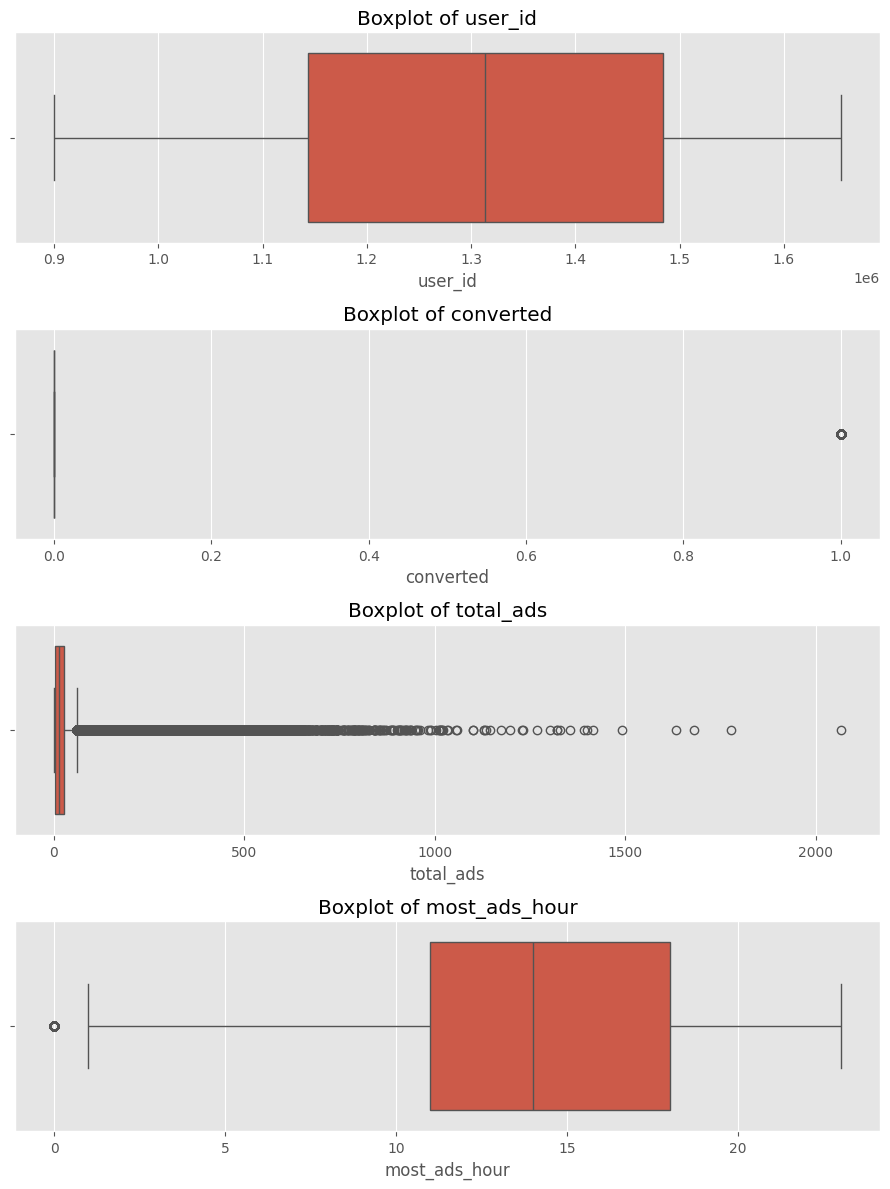

In [ ]:
#Plot a boxplot and use loop for enumerate
plt.figure(figsize = (9, len(numerical_features.columns) * 3))

for i, col in enumerate(numerical_features.columns):
  plt.subplot(len(numerical_features.columns), 1, i + 1)
  sns.boxplot(x= df[col])
  plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

Based on the analysis from boxplot, outlier is observed on total_ads column.

**Pattern**
The data has a mean which is slghtly greater than 0 and large number of outlier ranging from around 1 to 0ver 2000

**Insight**
Since the "total_ads" represent the number of ads a user was shown, these outliers could be crucial for understanding the behavior of highly exposed users and their conversion patterns. Keeping them will gain more insight to if a higher number of ads leads to conversion or if there are other factors at play for those who see many ads but don't convert thus understanding their existence in the dataset.


##**Exploratory analysis**

###**Univariate analysis**

In [ ]:
#First separate the columns feature into number and categoric
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(exclude=['int64', 'float64'])

In [ ]:
#Create a function to hold the columns features

#For numerical features

def num_univariate_analysis(numerical_data):
  for col_name in numerical_data:
    print(f"Column name:{col_name}")
    display(numerical_data[col_name].describe())
    display(numerical_data[col_name].value_counts().head(10))
    display("--"*50)
    display()

num_univariate_analysis(num_df)

Column name:user_id


,user_id
count,5.881010e+05
mean,1.310692e+06
std,2.022260e+05
min,9.000000e+05
25%,1.143190e+06
50%,1.313725e+06
75%,1.484088e+06
max,1.654483e+06


,count
user_id,
1237779,1
1069124,1
1119715,1
1144181,1
1435133,1
1561741,1
1380378,1
1223573,1
904721,1


'----------------------------------------------------------------------------------------------------'

Column name:converted


,converted
count,588101.000000
mean,0.025239
std,0.156850
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


,count
converted,
0,573258
1,14843


'----------------------------------------------------------------------------------------------------'

Column name:total_ads


,total_ads
count,588101.000000
mean,24.820876
std,43.715181
min,1.000000
25%,4.000000
50%,13.000000
75%,27.000000
max,2065.000000


,count
total_ads,
1,56606
2,39827
5,29303
3,28661
4,23426
6,23409
7,19095
15,19031
8,16037


'----------------------------------------------------------------------------------------------------'

Column name:most_ads_hour


,most_ads_hour
count,588101.000000
mean,14.469061
std,4.834634
min,0.000000
25%,11.000000
50%,14.000000
75%,18.000000
max,23.000000


,count
most_ads_hour,
13,47655
12,47298
11,46210
14,45648
15,44683
10,38939
16,37567
17,34988
18,32323


'----------------------------------------------------------------------------------------------------'

In [ ]:
#For categorical feature

def cat_univariate_analysis(categorical_data):
  for col_name in categorical_data:
    print(f"Column name:{col_name}")
    display(categorical_data[col_name].agg(["unique", "nunique", "count"]))
    display(categorical_data[col_name].value_counts())
    display("--"*50)
    display()


cat_univariate_analysis(cat_df)

Column name:test_group


,test_group
unique,"[ad, psa]"
nunique,2
count,588101


,count
test_group,
ad,564577
psa,23524


'----------------------------------------------------------------------------------------------------'

Column name:most_ads_day


,most_ads_day
unique,"[Monday, Tuesday, Friday, Saturday, Wednesday,..."
nunique,7
count,588101


,count
most_ads_day,
Friday,92608
Monday,87073
Sunday,85391
Thursday,82982
Saturday,81660
Wednesday,80908
Tuesday,77479


'----------------------------------------------------------------------------------------------------'

###**Univariate graphical analysis**

In [ ]:
#For numerical column

#Check for the number of column
num_col = len(num_df.columns)
num_col


4

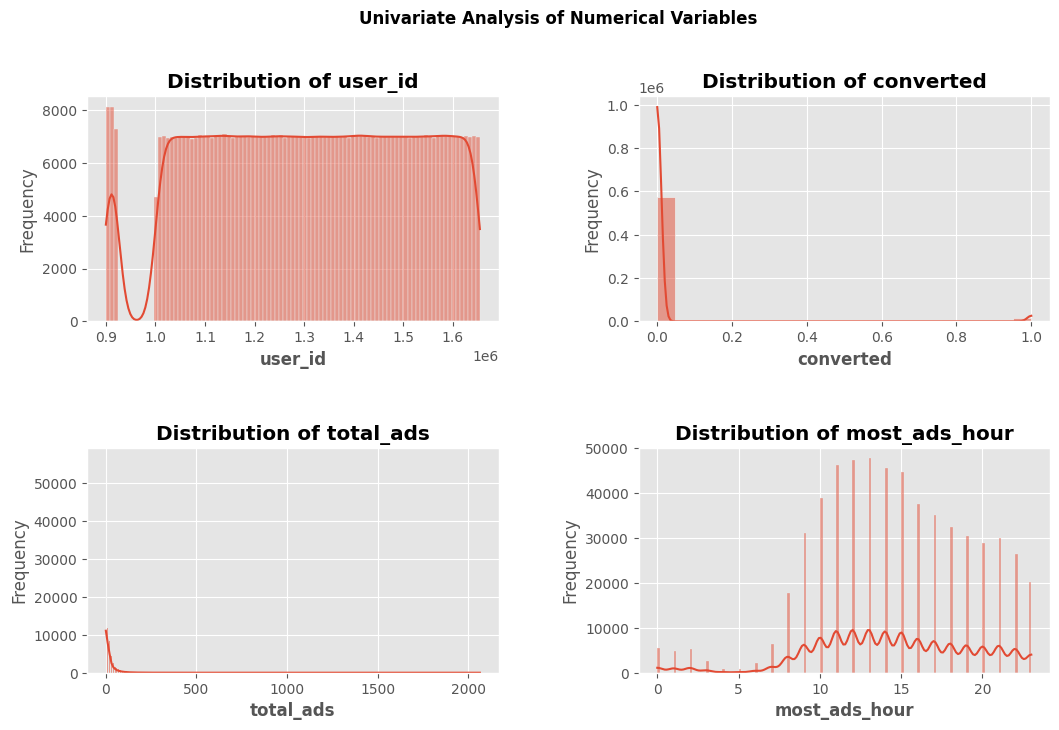

In [ ]:
#Creating a function to plot the graph

def univariate_analysis(num_df):
  num_col = len(num_df.columns)
  # Calculate the number of rows and columns for the subplots
  n_rows = (num_col + 1) // 2  # Ensure at least 1 row and handles odd number of columns
  n_cols = 2

  fig, axes = plt.subplots(nrows= n_rows, ncols= n_cols, figsize = (12, 4 * n_rows)) # Adjusted figsize
  fig.tight_layout(pad= 7.0)
  axes= axes.flatten()
  fig.suptitle("Univariate Analysis of Numerical Variables", fontsize = 12, fontweight= "bold") # Use suptitle for overall title


  for i, col_name in enumerate(num_df.columns):
    sns.histplot(data= num_df, x = col_name, kde = True, ax= axes[i])
    #For smooth kde distribution
    axes[i].set_title(f"Distribution of {col_name}", fontweight= "bold")
    axes[i].set_xlabel(col_name, fontweight= "bold")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True)


    # Hide extra axes if the number of columns is odd
  if num_col < len(axes):
      for j in range(num_col, len(axes)):
          fig.delaxes(axes[j])


  plt.show()

univariate_analysis(num_df)

**Pattern**

- Distribution of user_id: There is a uniform range from around 1.0 to over 1.6. There is a slight peak value which has 0.9 frequency.
- Distribution of coverted: It has a binary or bimodal distibution where 0.0 has the highest frequency.
- Distribution of total_ads: It has a right skewed distribution where the highest frequency falls on 0.
- Distribution of most_ads_hours: It has a multimodal distribution where the highest frequency is around 10 to 15.


**Insight**

- The user_id variable appears to be randomly and evenly distributed across a wide range, likely generated or anonymized IDs. There is a minor gap or drop in frequency around certain IDs, possibly due to missing or filtered-out users.
- The majority of users did not convert (0), while a small fraction did (1). This imbalance indicates a class imbalance problem, showing that most users didn't buy the product,
- Most users saw a small number of ads, with very few exposed to a large number (long tail). This could mean that the ad system targets many users a few times rather than bombarding a few users.The outliers in 'total_ads' represent a small group of users with unusually high ad exposure.
- There are clear peaks between 9 to 20 hours, suggesting higher ad activity during daytime hours — likely aligning with working hours or when users are more active online.

**Recommendation**
- Ads should be implemented during the hours of 9 to 20 as this is when there is active users thus increasing the market gain shares and attracting high paying royal and active users.
- Measures should be taken to monitor the level of conversion as this will help the marketing campaign and which ads is really generating market revenue


In [ ]:
#For categorical columns

#Check for the num of columns in categorical varable
cat_col = len(cat_df.columns)
cat_col

2

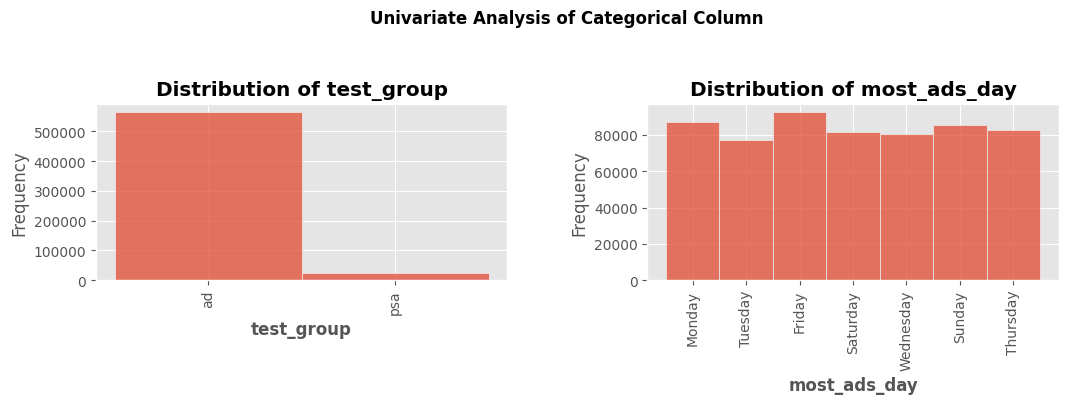

In [ ]:
#Create a function for the categorical variable

def univariate_analysis(cat_df):
  cat_col= len(cat_df.columns)
  n_rows = (cat_col + 1) // 2
  n_cols = 2

  fig, axes = plt.subplots(nrows= n_rows, ncols= n_cols, figsize = (12, 4 * n_rows))
  fig.tight_layout(pad=7.0)
  axes= axes.flatten()
  fig.suptitle("Univariate Analysis of Categorical Column", fontsize= 12, fontweight="bold")

  for i, col_name in enumerate(cat_df.columns):
    sns.histplot(data= cat_df, x=col_name,ax= axes[i])
    axes[i].set_title(f"Distribution of {col_name}", fontweight="bold")
    axes[i].set_xlabel(col_name, fontweight= "bold")
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis="x", rotation = 90)
    axes[i].grid(True)

    if cat_col < len(axes):
      for j in range(cat_col, len(axes)):
        fig.delaxes(axes[j])

  plt.show()

univariate_analysis(cat_df)

**Pattern**:
- Distribution of test_group: ad has the highest frequency of over 500000 while psa has a lower frequency between 0 and 100000.
- Distribution of most_ads_day: The distribution frequency seem to be in uniform range with friday having the highest frequency of over 80000 and tuesday having the lowest frequency of under 80000

**Insight**

- The use of ads seems to be successful hence the usage but usage of these can introduce class imbalance in the dataset in terms of the level of conversion.
- Distribution is fairly even across all days, with slightly more activity on Fridays and Mondays. Suggests that ads were served consistently throughout the week with minor peaks likely due to higher weekday activity.

**Recommendation**
- The ads should be implemented using weekend and monday as user tends to be active during these period. This could be as the result of event or celebration or free work days during weekend hence increasing buying pressures at this period of time.
- The ratio of ads and psa should be the same or balanced to reduce or eliminate class bias and imbalance thus affecting the performances of the hypothesis testing and potential machine learning.



###**Bivariate and Multivariate Analysis**

####**Analyze conversion rates by test group**

Conversion rate by test group:


,test_group,converted,conversion_rate
0,ad,0.025547,2.554656
1,psa,0.017854,1.785411


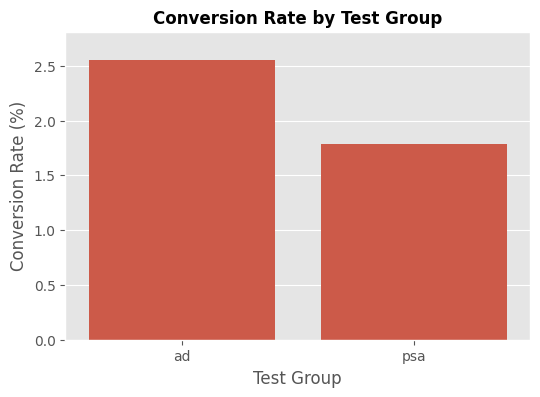

In [ ]:
#Check the conversion and the test group
conversion_by_test_group = df.groupby("test_group")["converted"].mean().reset_index()
conversion_by_test_group["conversion_rate"]= conversion_by_test_group["converted"]*100
print(f"Conversion rate by test group:")
display(conversion_by_test_group)

#Create visualization
plt.figure(figsize=(6,4))
sns.barplot(x="test_group", y="conversion_rate", data=conversion_by_test_group)
plt.title("Conversion Rate by Test Group", fontsize= 12, fontweight= "bold")
plt.xlabel("Test Group")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, conversion_by_test_group["conversion_rate"].max() * 1.1)
plt.show()


**Pattern**
- Ads has the highest conversion rate and psa has the lowest rate.

**Insight**
- Ads is more succcessful in converting users into high paying, loyal customer and effective marketing gain and revenue.

**Recommendation**
- More  investigation should be done to carry out if the distribution of users in the ads and psa were at the same ratio to avoid bias.
- Ads should be used in effective marketing campaign as this has high conversion rate.

####**Analyze conversion by most ads day and most ads hour**

Conversion rate by day:


,most_ads_day,converted,conversion_rate
1,Monday,0.032812,3.281155
5,Tuesday,0.029840,2.984034
6,Wednesday,0.024942,2.494191
4,Thursday,0.021571,2.157094
0,Friday,0.022212,2.221190
2,Saturday,0.021051,2.105070
3,Sunday,0.024476,2.447565


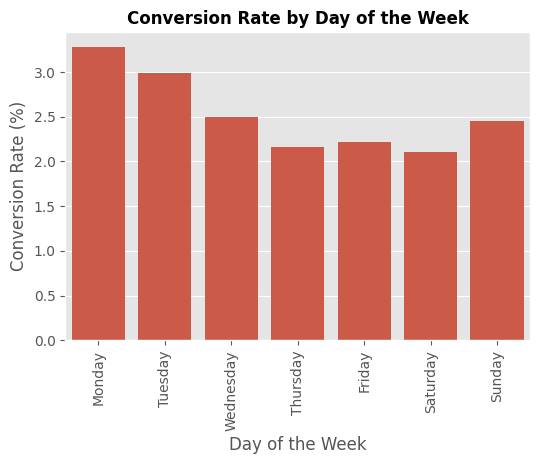

In [ ]:
#Determine which day of the week have the highest conversion rate
conversion_by_day= df.groupby("most_ads_day")["converted"].mean().reset_index()
conversion_by_day["conversion_rate"]= conversion_by_day["converted"]*100

# Define the desired order of the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'most_ads_day' to a categorical type with the specified order
conversion_by_day['most_ads_day'] = pd.Categorical(conversion_by_day['most_ads_day'], categories=day_order, ordered=True)

# Sort the DataFrame by the ordered 'most_ads_day'
conversion_by_day = conversion_by_day.sort_values('most_ads_day')

print(f"Conversion rate by day:")
display(conversion_by_day)

#Create visualization
plt.figure(figsize=(6,4))
sns.barplot(x="most_ads_day", y="conversion_rate", data=conversion_by_day)
plt.title("Conversion Rate by Day of the Week", fontsize= 12, fontweight= "bold")
plt.xlabel("Day of the Week")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=90)
plt.show()

**Pattern**
- Monday and Tuesday has the highest conversion rate of user while Thursday and Saturday has slighly lower conversion rate.

**Insight**
- There is a highest conversion rate on weekday than weekend day apart from sunday. This could be as a result of user being convicted to buy on weekend and make the purchase on working day because they have access to their financial or they have a new week plans.

**Recommendation**

- Marketing campaign should be carry out on normal day as users tends to be converted on that days and slightly on weekday as this is where the users tends to make decision of either buying the product.

Conversion rate by hour:


,most_ads_hour,converted,conversion_rate
0,0,0.018425,1.842486
1,1,0.012911,1.291129
2,2,0.007313,0.731296
3,3,0.010452,1.045166
4,4,0.015235,1.523546
5,5,0.020915,2.091503
6,6,0.022244,2.224371
7,7,0.018111,1.811085
8,8,0.019516,1.951552
9,9,0.019191,1.919107


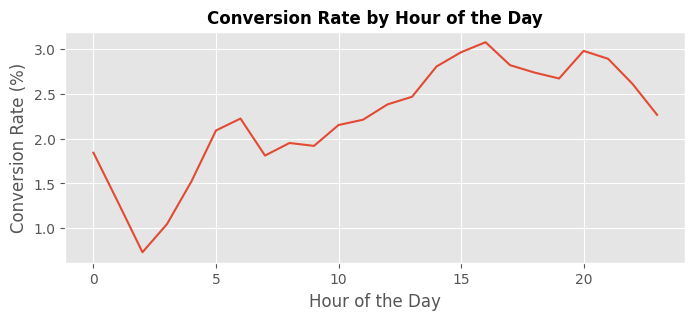

In [ ]:
#Determine which hours has the highest conversion rate

conversion_by_hour= df.groupby("most_ads_hour")["converted"].mean().reset_index()
conversion_by_hour["conversion_rate"]= conversion_by_hour["converted"]* 100
print(f"Conversion rate by hour:")
display(conversion_by_hour)


#Create visualization
plt.figure(figsize=(8, 3))
sns.lineplot(x="most_ads_hour", data= conversion_by_hour, y= "conversion_rate")
plt.title("Conversion Rate by Hour of the Day", fontsize= 12, fontweight= "bold")
plt.xlabel("Hour of the Day")
plt.ylabel("Conversion Rate (%)")
plt.show()

**Pattern**
- The most_ads_hour has a uptrend with a slight decrease in the 20 hours
- Between hour 10 and 20 has the highest conversion rate of users while hour 2 has the lowest conversion rate.

**Insight**
- The low conversion rate could be as the users normal sleeping routine, many users are still sleeping while few users are active online.
- The high conversion is due the active hours of the day that is dayttime.

**Recommendation**

- Marketing campaign should be carry out in the daytime as users are alway active by this time.
- Although the lowest conversion hour should not be overlook as they are like the catalyst to the uptrend movement thus buildng the buying decision of the user.

####**Examine user behavior patterns**


In [ ]:
#To investigate the user behaviour of those that didnt converted

# Filter for users who did not convert and had a high number of total ads
# Define a threshold for "high number of total ads". use the 75th percentile or a higher value.
# Let's use the 75th percentile + 1.5 * IQR as a starting point for identifying potential outliers/high exposure
Q1 = df['total_ads'].quantile(0.25)
Q3 = df['total_ads'].quantile(0.75)
IQR = Q3 - Q1
high_ads_threshold = Q3 + 1.5 * IQR

non_converted_high_ads = df[(df['converted'] == 0) & (df['total_ads'] >= high_ads_threshold)]

print(f"Number of users who did not convert and saw a high number of ads (>= {high_ads_threshold:.2f}): {len(non_converted_high_ads)}")

# Analyze the distribution of most_ads_day and most_ads_hour for this group
print("\nDistribution of most_ads_day for non-converted users with high ads:")
display(non_converted_high_ads['most_ads_day'].value_counts())

print("\nDistribution of most_ads_hour for non-converted users with high ads:")
display(non_converted_high_ads['most_ads_hour'].value_counts().sort_index())

Number of users who did not convert and saw a high number of ads (>= 61.50): 44329

Distribution of most_ads_day for non-converted users with high ads:


,count
most_ads_day,
Friday,7913
Monday,6506
Sunday,6293
Saturday,6288
Wednesday,6206
Thursday,5739
Tuesday,5384



Distribution of most_ads_hour for non-converted users with high ads:


,count
most_ads_hour,
0,413
1,432
2,403
3,194
4,93
5,138
6,388
7,763
8,1260


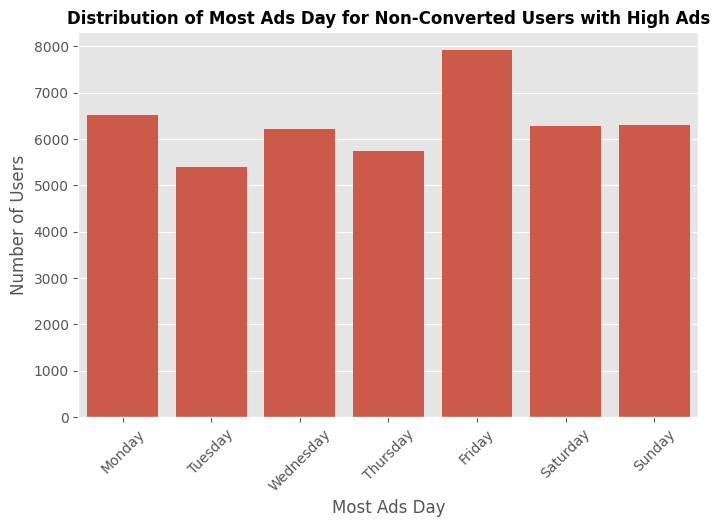

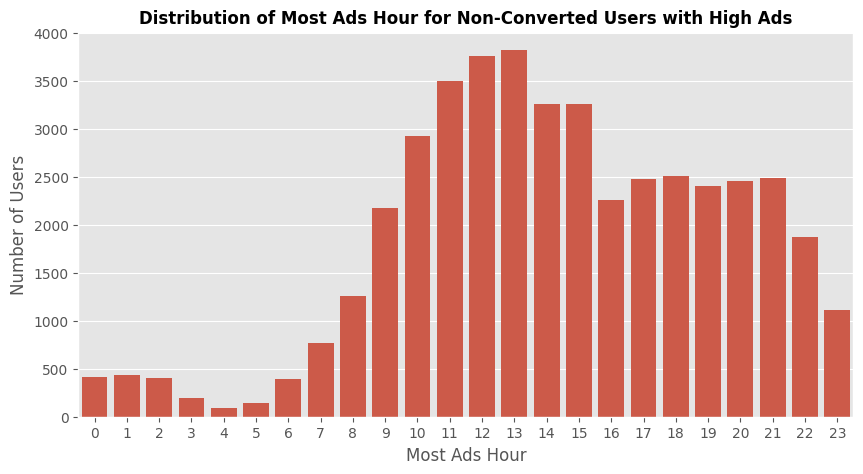

In [ ]:
# Visualize the distribution of most_ads_day for non-converted users with high ads
plt.figure(figsize=(8, 5))
sns.countplot(data=non_converted_high_ads, x='most_ads_day', order=day_order)
plt.title('Distribution of Most Ads Day for Non-Converted Users with High Ads', fontsize=12, fontweight='bold')
plt.xlabel('Most Ads Day')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of most_ads_hour for non-converted users with high ads
plt.figure(figsize=(10, 5))
sns.countplot(data=non_converted_high_ads, x='most_ads_hour', order=sorted(non_converted_high_ads['most_ads_hour'].unique()))
plt.title('Distribution of Most Ads Hour for Non-Converted Users with High Ads', fontsize=12, fontweight='bold')
plt.xlabel('Most Ads Hour')
plt.ylabel('Number of Users')
plt.show()

**Pattern**
- Distribution of Most Ads Day for Non-Converted Users with High Ads: Friday has the highest day of non-conversion rate.
- Distribution of Most Ads Hour for Non-Converted Users with High Ads: The hours between 11 and 13 has the highest non-conversion rate.

**Insight**
- For the distribution of the Most Ads Day, friday is normally the day user have family and social gathering thus their attention might be splitted into offline shopping but still have buying potential decision.
- For the distribution of the Most Ads Hour, the hour of 11 to 13 can be an indicator where users might be preoccupied with their normal live activities.

**Recommendation**
- More investigation should be done to determine other factors such as location and user persona in order to determine the best conversion rate.
- Despite the non-conversion, marketing campaigns in these hours and days should be overlooked as it is a drive for potential user decision on the market campaign. It forms a bedrock for converted users.

#**STEP 5: Evaluating the Impact of Market Campaign**


####**Analyze the experimental and control groups to determine if the ads were successful.**



In [ ]:
#Determine the experimental and control groups to determine if the ads were successful

#Divide the test group into experimental and control groups
experimental_group = df[df["test_group"] == "ad"]
control_group = df[df["test_group"] == "psa"]
print(f"Number of users in the experimental group: {len(experimental_group)}")
print(f"Number of users in the control group: {len(control_group)}")


Number of users in the experimental group: 564577
Number of users in the control group: 23524


In [ ]:
#Calculate the conversion rate for each groups
conversion_experimental = experimental_group["converted"].mean()
conversion_control = control_group["converted"].mean()
print(f"Conversion rate for the experimental group: {conversion_experimental:.2%}")
print(f"Conversion rate for the control group: {conversion_control:.2%}")

Conversion rate for the experimental group: 2.55%
Conversion rate for the control group: 1.79%


In [ ]:
#Calculate the observed difference
observed_difference = conversion_experimental - conversion_control
print(f"Observed difference in conversion rates: {observed_difference:.2%}")

Observed difference in conversion rates: 0.77%


Conversion and Non-Conversion Rates by Test Group:


converted,Non-Converted (%),Converted (%)
test_group,,
ad,97.445344,2.554656
psa,98.214589,1.785411


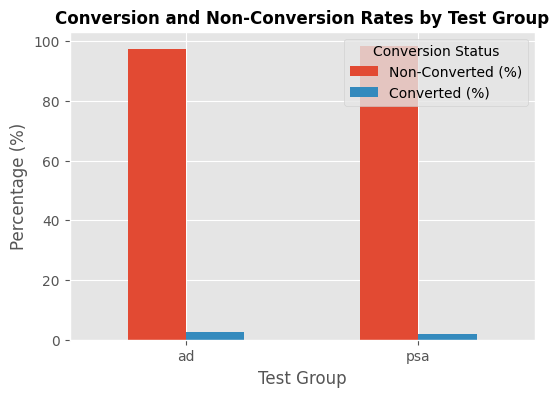

In [ ]:
#Calculate the conversion and non-conversion count for each group
conversion_counts = df.groupby("test_group")["converted"].value_counts(normalize=True).unstack() * 100
conversion_counts = conversion_counts.rename(columns={0: 'Non-Converted (%)', 1: 'Converted (%)'})

print("Conversion and Non-Conversion Rates by Test Group:")
display(conversion_counts)

#Create stacked bar plot
conversion_counts.plot(kind='bar', stacked=False, figsize=(6, 4))
plt.title("Conversion and Non-Conversion Rates by Test Group", fontsize=12, fontweight="bold")
plt.xlabel("Test Group")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Conversion Status")
plt.show()

**Insight**
- The experimental group has slightly high conversion rate than the control group
- The control group has slightly lower non-conversion rate than the experimental group.

**Recommendation**
- Futher research and investigation should be carried out to find out which group perform best if it is on the same ratio without bias and class imbalance

**Perform  the Two-Sample Z-Test for Proportions.**

**Hypothesis Question**

**Null Hypothesis (H₀):** There is no significant difference in conversion rates between the experimental (ad) and control (psa) groups.

**Alternative Hypothesis (H₁):** There is a significant difference in conversion rates between the experimental (ad) and control (psa) groups.


In [ ]:
#Prepare the count and sample size for the z test
count= [experimental_group["converted"].sum(), control_group["converted"].sum()]
nobs= [len(experimental_group), len(control_group)]

#Set the significance level(alpha)
alpha= 0.05

# Perform the two-sample z-test for proportions
# alternative='two-sided' matches our Alternative Hypothesis (H₁)
z_statistic, p_value = proportions_ztest(count, nobs, alternative='two-sided')

# Print the results of the z-test
print(f"Z-statistic: {z_statistic:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Significance Level (alpha): {alpha}")


Z-statistic: 7.3701
P-value: 0.0000
Significance Level (alpha): 0.05


In [ ]:
#Interpret the result of the hypothesis testing

if p_value < alpha:
    print("Result: Reject the null hypothesis (H₀)")
    print("Conclusion: There is a statistically significant difference in conversion rates between the experimental (ad) and control (psa) groups.")
else:
    print("Result: Fail to reject the null hypothesis (H₀)")
    print("Conclusion: There is no statistically significant difference in conversion rates between the experimental (ad) and control (psa) groups.")

Result: Reject the null hypothesis (H₀)
Conclusion: There is a statistically significant difference in conversion rates between the experimental (ad) and control (psa) groups.


**Pattern**
- The Z-statistic is 7.3701
- The P-value is 0.0000

**Insight**

- The Z-statistic measures the difference between the two group proportions in terms of standard deviations, the Z- statistic of 7.3701 is quite large and observed difference between the groups is further away from zero
- The low P-value of 0.0000 indicates that the observed difference in conversion rates ishighly statistically significant", which leads to rejecting the null hypothesis.
- Since the P-value is less than the significance level of 0.05, null hypothesis is rejected.
- Based on the pattern, the experimental group shows the ads is successful.
- There is statistical significance of the differences between the groups using A/B testing techniques.

**Recommendation**
- The experimental group should be implemented as it is an indicator of a successful ads that help in revenue and effective market campaign.
- Further investigation could explore ways to improve the control group's performance




####**Estimate the potential revenue generated from the ads.**


In [ ]:
#Estimate revenue

#Let the potential revenue conversion be 10 dollar per conversion
revenue_per_conversion = 20
potential_revenue_experimental_per_user = conversion_experimental * revenue_per_conversion
potential_revenue_control_per_user = conversion_control * revenue_per_conversion

# Calculate total potential revenue for the experimental group
total_potential_revenue_experimental = potential_revenue_experimental_per_user * len(experimental_group)
total_potential_revenue_control = potential_revenue_control_per_user * len(control_group)


print(f"Potential revenue generated from the ads per user (experimental group): ${potential_revenue_experimental_per_user:.2f}")
print(f"Potential revenue generated from the psa per user (control group): ${potential_revenue_control_per_user:.2f}")
print(f"\nTotal potential revenue generated from the ads (experimental group): ${total_potential_revenue_experimental:.2f}")
print(f"Total potential revenue generated from the psa (control group): ${total_potential_revenue_control:.2f}")

Potential revenue generated from the ads per user (experimental group): $0.51
Potential revenue generated from the psa per user (control group): $0.36

Total potential revenue generated from the ads (experimental group): $288460.00
Total potential revenue generated from the psa (control group): $8400.00


**Pattern**
- The potential revenue generated from experimental group per user is 0.51.
- The potential revenue generated from control group per user is 0.36
- Total potential revenue generated from experimental group is 288460.00
- Total potential revenue generated from control group is 8400.00

**Insight**
- The ads experimental groups give more revenue indicating the marketing campaign is successful

**Recommendation**
- The use of Ads should be promoted as this boost revenue, market share gain and converting high paying customers.
- Investigating the control group's performance could offer insights for future testing and overall marketing optimization, but the significantly higher total potential revenue demonstrated by the experimental ad campaign strongly indicates its current effectiveness